# Look at the big picture

Dataset Description:

- artist: Name of the Artist.

- song: Name of the Track.

- popularity: The higher the value the more popular the song is.

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- duration in milliseconds :Time of the song

- time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

- Class: Genre of the track.


# **Install and import libraries**

In [1]:
# Install AutoGluon.
# AutoGluon is used in AutoML.
# AutoML automatically finds the best model with the best hyperparameters for a given dataset.
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using ca

In [1]:
# import langdetect
# langdetect is used to detect the language of a given text
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=333b51561593e3e77c5147dd94977bacbfa9e383263ee3287947fda9c814d6b7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
# Data manipulation libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np   # Library for numerical operations
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Import Plotly Express for creating interactive charts


# Utility libraries
from collections import Counter                 # Library for counting hashable objects
from tqdm import tqdm                           # Library for progress bars
from langdetect import detect, DetectorFactory  # Libraries for language detection
import re                                       # Library for regular expressions

# Set seed for language detection to ensure reproducibility
DetectorFactory.seed = 0

# AutoGluon library for automated machine learning
from autogluon.tabular import TabularPredictor  # TabularPredictor class for tabular data predictions

# **Reading Data**

In [3]:
# Load the training dataset from a CSV file
train = pd.read_csv('/content/train (1).csv')

# Load the test dataset from a CSV file
test = pd.read_csv('/content/test (2).csv')

# Explore Data

In [ ]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [4]:
# Add a placeholder 'Class' column to the test dataset
test['Class'] = -1

# Concatenate the training and test datasets for unified data treatment
full = pd.concat([train, test], ignore_index=True)

# Reset the index of the concatenated DataFrame
full = full.reset_index()

# Drop the old index column
full = full.drop('index', axis=1)

# Print the shape of the concatenated DataFrame
print(full.shape)

(17996, 18)


In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17996 non-null  int64  
 1   Artist Name         17996 non-null  object 
 2   Track Name          17996 non-null  object 
 3   Popularity          17568 non-null  float64
 4   danceability        17996 non-null  float64
 5   energy              17996 non-null  float64
 6   key                 15982 non-null  float64
 7   loudness            17996 non-null  float64
 8   mode                17996 non-null  int64  
 9   speechiness         17996 non-null  float64
 10  acousticness        17996 non-null  float64
 11  instrumentalness    13619 non-null  float64
 12  liveness            17996 non-null  float64
 13  valence             17996 non-null  float64
 14  tempo               17996 non-null  float64
 15  duration_in min/ms  17996 non-null  float64
 16  time

- The dataset consists of 17996 entries and 18 columns.


- The columns are mostly of type float64, with some being int64 and object.
- Some columns have missing values, notably 'popularity', 'key', and 'mode'.
- The total memory usage is approximately 2.0 MB.

In [ ]:
full.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,17996.0,8998.500000,5195.142058,1.000000,4499.750000,8998.50000,13497.25000,17996.000
Popularity,17568.0,44.512124,17.426928,1.000000,33.000000,44.00000,56.00000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.54500,0.65900,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.70000,0.86000,1.000
key,15982.0,5.952447,3.196854,1.000000,3.000000,6.00000,9.00000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.01600,-5.18900,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.04740,0.08300,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.08140,0.43400,0.996
instrumentalness,13619.0,0.177562,0.304048,0.000001,0.000089,0.00391,0.20000,0.996


1. Popularity: The average popularity score is 44.53 with a standard deviation of 17.42. This indicates a moderate level of popularity across tracks, with some variation.

2. Danceability & Energy: Both attributes have high average values (0.54 and 0.66 respectively), suggesting that most tracks are suitable for dancing and have high energy.

3. Key & Mode: The majority of tracks are in the key of 5.95 (close to F) and have a mode value of 0.64, indicating a preference for major scales.

4. Loudness: Tracks tend to be relatively loud with an average of -7.90 dB, typical for modern music production.

5. Speechiness & Acousticness: Low average values (0.08 and 0.25) suggest that tracks are generally more musical than spoken and not highly acoustic.

6. Instrumentalness: The average instrumentalness is 0.18, indicating that many tracks contain vocals.

7. Liveness: With an average of 0.20, most tracks do not strongly feature live recordings.

8. Valence: An average of 0.49 indicates a balance between happy and sad tracks in the dataset.

9. Tempo: The average tempo is 122.70 BPM, suitable for a variety of musical genres.

10. Duration: The average track duration is about 200,094 milliseconds (approximately 3.3 minutes), which is typical for popular music.

11. Time Signature: Most tracks have a time signature of 4/4, which is common in popular music.

12. Class (Genre): The average genre class value is 6.70, indicating a diverse range of genres in the dataset.

In [ ]:
#more information about catigorical features
full.describe(exclude='number')

,Artist Name,Track Name
count,17996,17996
unique,9149,15129
top,Backstreet Boys,Dreams
freq,69,9


1. Artist Diversity: There is a significant diversity in the artists represented, with 7913 unique artists.
2. Popularity: Backstreet Boys are the most frequent artist in this dataset, indicating their high popularity.
3. Track Diversity: The dataset contains a wide variety of tracks, with 12455 unique track names.
4. Most Common Track: The track "Fire" is the most common, but it only appears 8 times, suggesting a high variety of tracks overall.

These insights highlight the wide range of artists and tracks in the dataset, reflecting diverse musical tastes.

#Visualize the Data to Gain Insights

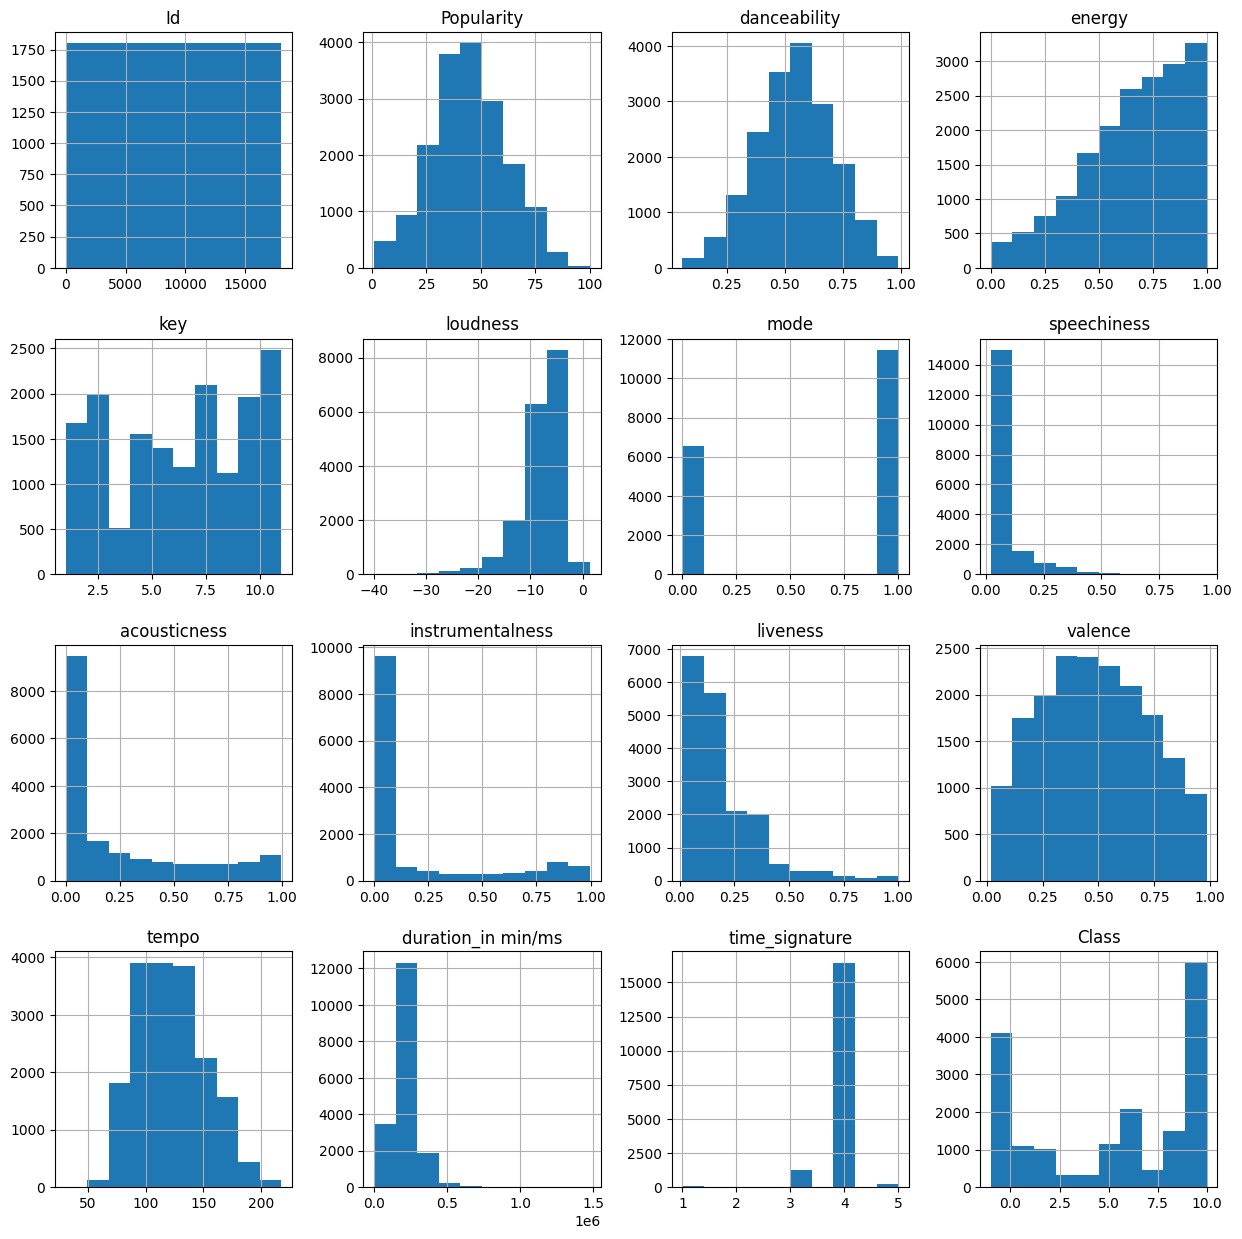

In [ ]:
full.hist(figsize=(15,15))
plt.show()

1. Popularity: Shows a near-normal distribution, with most tracks having moderate popularity around the 40-60 range.
2. Danceability: Also normally distributed, peaking around 0.6, indicating that most tracks have moderate danceability.
3. Energy: Skewed towards higher values, suggesting many tracks have high energy.
4. Key: Almost uniformly distributed, but some keys are slightly more common.
5. Loudness: Skewed towards lower values, with most tracks around -10 dB.
6. Mode: Binary distribution, with more tracks in a major key (1) than a minor key (0).
7. Speechiness, Acousticness, Instrumentalness, Liveness: All skewed towards lower values, indicating most tracks are not very speech-like, acoustic, instrumental, or live.
8. Valence: Normally distributed, with a peak around 0.5, meaning tracks have a moderate positive or negative tone.
9. Tempo: Normally distributed, with a peak around 120 BPM.
10. Duration in milliseconds: Shows a right skew, with most tracks under 500,000 milliseconds (8.3 minutes).
11. Time Signature: Dominated by 4/4 time, which is the most common in Western music.
12. Class: Diverse distribution with varying counts, indicating a variety of genres in the dataset.

In [ ]:
# Select only numerical columns and calculate the correlation matrix
corr_matrix = full.select_dtypes(include=['number']).corr()
corr_matrix

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,1.000000,0.005206,0.009416,-0.004580,0.002849,-0.008854,-0.017295,-0.011292,-0.003027,-0.000677,-0.002908,-0.002221,-0.006381,0.018559,-0.002399,-0.505689
Popularity,0.005206,1.000000,0.167213,0.051538,0.005901,0.124915,0.016584,0.031664,-0.125410,-0.167661,-0.072298,0.054824,-0.006050,-0.031118,0.067062,0.097927
danceability,0.009416,0.167213,1.000000,-0.093838,0.006702,0.059723,-0.067135,0.199042,0.009055,-0.200752,-0.109485,0.444548,-0.183527,-0.121624,0.137455,-0.064270
energy,-0.004580,0.051538,-0.093838,1.000000,0.015934,0.767869,-0.035880,0.125427,-0.745963,-0.180276,0.195634,0.222998,0.210224,0.245768,0.145281,0.129562
key,0.002849,0.005901,0.006702,0.015934,1.000000,0.002660,-0.112452,0.001822,-0.009112,0.001411,0.015125,0.031744,0.013965,0.014547,0.006965,-0.001932
loudness,-0.008854,0.124915,0.059723,0.767869,0.002660,1.000000,-0.033650,0.096027,-0.612824,-0.343672,0.112022,0.181086,0.164272,0.172010,0.127775,0.109899
mode,-0.017295,0.016584,-0.067135,-0.035880,-0.112452,-0.033650,1.000000,-0.074609,0.024035,-0.026771,-0.001563,-0.002986,0.021211,-0.069307,-0.019989,-0.013757
speechiness,-0.011292,0.031664,0.199042,0.125427,0.001822,0.096027,-0.074609,1.000000,-0.086648,-0.067632,0.070406,0.053885,0.048948,0.005044,0.056237,-0.030704
acousticness,-0.003027,-0.125410,0.009055,-0.745963,-0.009112,-0.612824,0.024035,-0.086648,1.000000,0.174139,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936,-0.148396
instrumentalness,-0.000677,-0.167661,-0.200752,-0.180276,0.001411,-0.343672,-0.026771,-0.067632,0.174139,1.000000,-0.047189,-0.228144,-0.038586,-0.004551,-0.061745,-0.015004


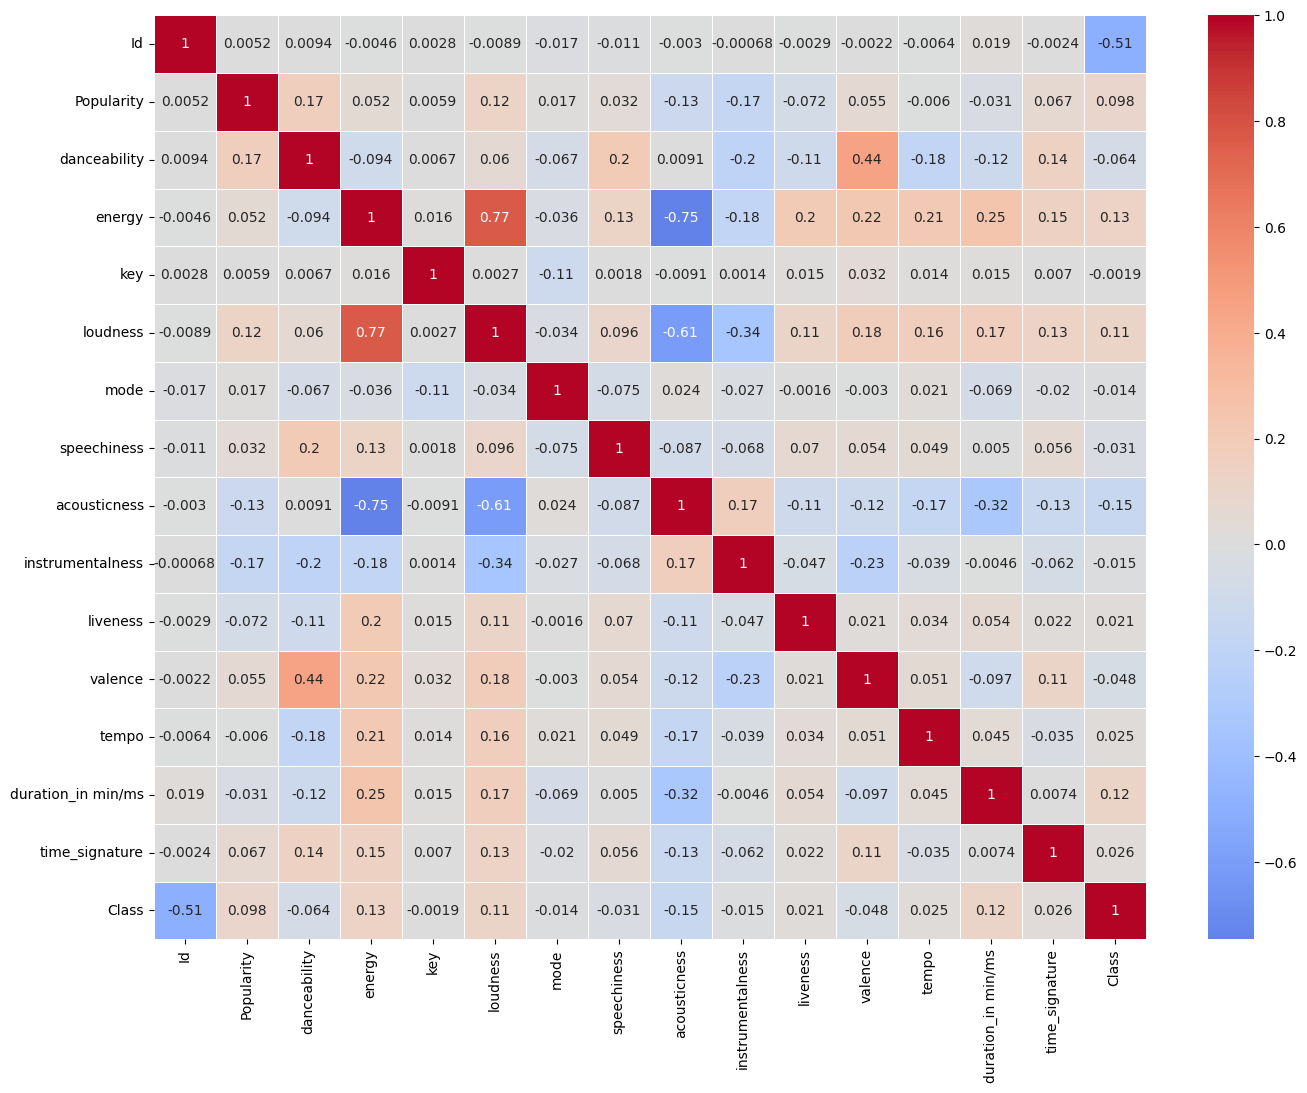

In [ ]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.show()

- Popularity has a positive correlation with danceability (0.17), indicating that more danceable songs tend to be more popular.
- Energy also shows a slight positive correlation with popularity (0.05).
- Loudness is strongly correlated with energy (0.77) and has a moderate positive correlation with popularity (0.12).
- Acousticness and instrumentalness are negatively correlated with popularity (-0.13 and -0.17, respectively), implying that more acoustic or instrumental tracks are generally less popular.
- Valence (positiveness of the track) shows a moderate positive correlation with danceability (0.44) and energy (0.23).
- Tempo has a very weak correlation with most variables but has a small positive correlation with energy (0.21).

In [ ]:
#correlation with price
corr_matrix["Class"].sort_values(ascending=False)

,Class
Class,1.000000
energy,0.129562
duration_in min/ms,0.115422
loudness,0.109899
Popularity,0.097927
time_signature,0.025551
tempo,0.024572
liveness,0.020890
key,-0.001932
mode,-0.013757


there is no srtong linear relationship between the features and the label

In [ ]:
# 1. Select the top 10 most common Artists:
top10_Artist = full["Artist Name"].value_counts().head(10)  # Keep only the first 10 entries

# 2. Create a bar chart using Plotly Express:
fig = px.bar(
    top10_Artist,  # Data for the chart
    x=top10_Artist.index,  # Set the Artist Name as the x-axis labels
    y=top10_Artist.values,  # Set the count of tracks as the y-axis values
    color=top10_Artist.index,  # Set the Artist Name as the color of the bars
    text=top10_Artist.values,  # Add text labels for the counts on the bars
    labels={'index':' ', 'y':'Number of Traks', 'text':'Number of Traks'},  # Adjust chart labels
    title='<b> Top 10 most common Artists'  # Set the chart title
)

# 3. Display the chart:
fig.show()

In [ ]:
# 1. Select the Top 10 Tracks Popularity:
top10_Tracks = full.nlargest(10, 'Popularity')[["Track Name", "Popularity"]]

# 2. Create a bar chart using Plotly Express:
# It provides insights into which tracks are currently trending or have achieved significant popularity.
# This information can be useful for understanding listener preferences and identifying potential hits.
fig = px.bar(
    top10_Tracks,  # Data for the chart
    x=top10_Tracks["Track Name"],  # Set the Track Name as the x-axis labels
    y=top10_Tracks["Popularity"],  # Set the Popularity as the y-axis values
    color=top10_Tracks["Track Name"],  # Set the Track Name as the color of the bars
    text=top10_Tracks["Popularity"],  # Add text labels for the Popularity on the bars
    labels={'x':'Track Name', 'y':'Popularity', 'text':'Popularity'},  # Adjust chart labels
    title='<b> Top 10 Tracks Popularity'  # Set the chart title
)

# 3. Display the chart:
fig.show()

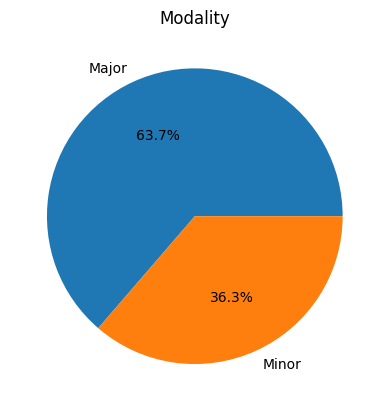

In [ ]:
# pie chart of Modality
plt.pie(full["mode"].value_counts(), labels=["Major", "Minor"], autopct='%1.1f%%')
plt.title("Modality")
plt.show()

the majority of tracks in the dataset are in a major key (63.7%), while minor key tracks make up a smaller proportion (36.3%). This suggests a general preference for major keys in the dataset.

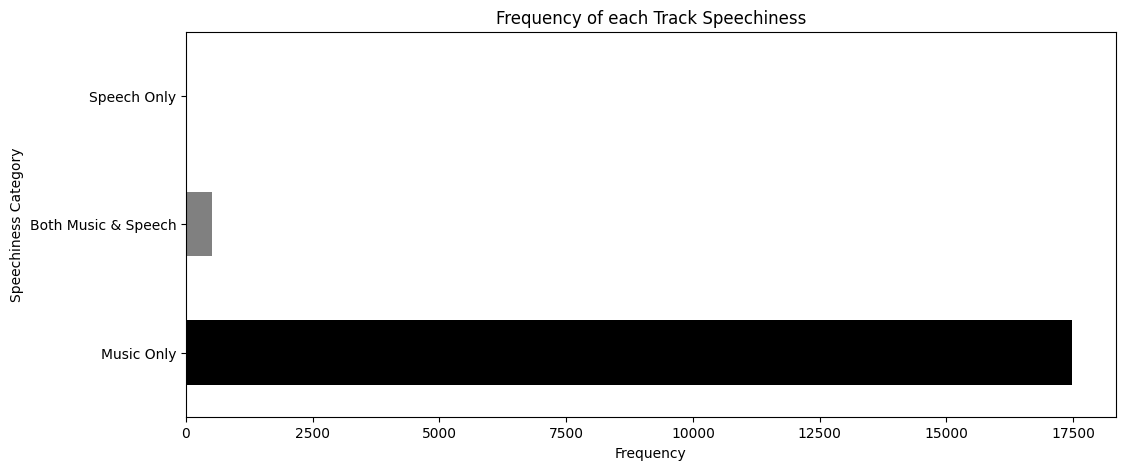

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
pd.cut(full["speechiness"],
       bins=[0., 0.33, 0.66, 1],
       labels=["Music Only", "Both Music & Speech", "Speech Only"]).value_counts().plot(
                                                            kind="barh",
                                                            xlabel="Frequency",
                                                            ylabel="Speechiness Category",
                                                            title="Frequency of each Track Speechiness",
                                                            ax=ax,
                                                            color=['black', 'gray', 'yellow']
                                                        )
plt.show()

The vast majority of tracks in the dataset are classified as "Music Only," indicating a low presence of spoken words. This suggests that the dataset primarily consists of instrumental or vocal music with minimal spoken content.

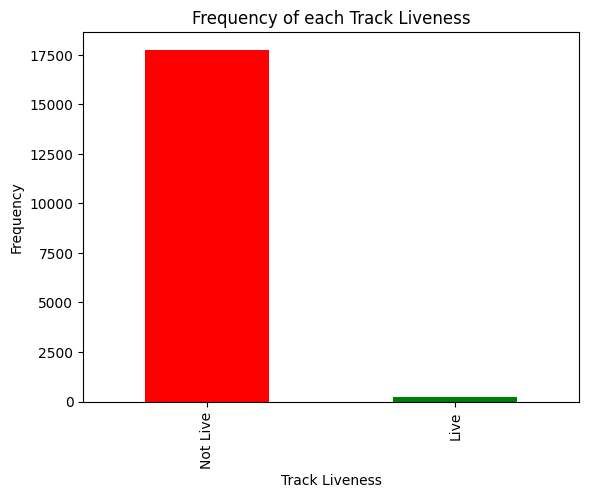

In [ ]:
pd.cut(full["liveness"],
       bins=[0., 0.8, 1],
       labels=["Not Live", "Live"]).value_counts().plot(
                                                            kind="bar",
                                                            xlabel="Track Liveness",
                                                            ylabel="Frequency",
                                                            title="Frequency of each Track Liveness",
                                                            color=['red', 'green']
                                                        )
plt.show()

The vast majority of tracks in the dataset are classified as "Not Live".

This indicates a low likelihood of the tracks being recorded in a live setting.

This suggests that the dataset predominantly consists of studio recordings rather than live performances.

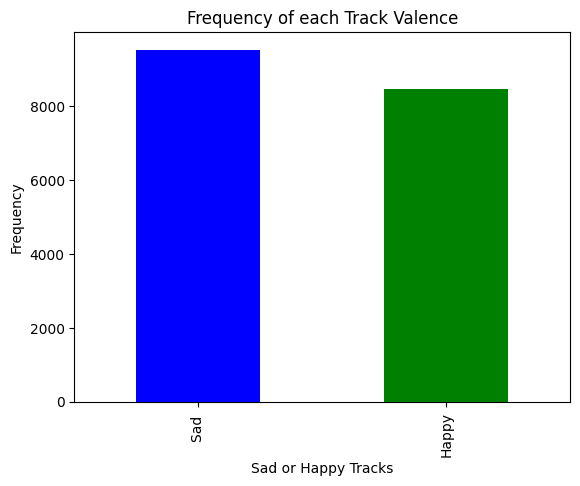

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.cut(full["valence"],
       bins=[0., 0.5, 1],
       labels=["Sad ", "Happy"]).value_counts().plot(
                                                            kind="bar",
                                                            xlabel="Sad or Happy Tracks",
                                                            ylabel="Frequency",
                                                            title="Frequency of each Track Valence",
                                                            color=['blue', 'green']
                                                        )
plt.show()


The distribution of valence, which measures the musical positiveness of a track, is almost balanced between "Sad" and "Happy" categories.

This suggests that the dataset contains a diverse range of emotions, offering a mix of tracks that evoke both positive and negative feelings.

This balance can be valuable for creating playlists or recommendations that cater to different moods and preferences.

# **Data Processing and feature engineering**

In [5]:
# Preprocessing and feature extraction for the 'duration_in min/ms' column
dur   = full['duration_in min/ms']
track = []
clean = []

# Process each value in the 'duration_in min/ms' column
for i in dur:
    if i <= 100:
        clean.append(i)  # If the value is less than or equal to 100, keep it as is
        track.append(0)  # Append 0 to the 'track' list
    else:
        clean.append(i / 60000)  # Convert values greater than 100 from milliseconds to minutes
        track.append(1)          # Append 1 to the 'track' list

# Update the 'duration_in min/ms' column with processed values
full['duration_in min/ms'] = clean

# Add a new column 'new1' to indicate the duration type
full['new1'] = track

In [6]:
# Feature engineering functions

def count_special_character(string):
    """
    Count the number of special characters in a string (non-digit characters).

    Args:
    string (str): The input string.

    Returns:
    int: The count of special characters in the string.
    """
    special_char = 0
    for i in range(len(string)):
        ch = string[i]
        if not ch.isdigit():   # Check if the character is not a digit
            special_char += 1  # Increment count for special characters
    return special_char

def feature_engineering(df):
    """
    Add new features to the DataFrame for feature engineering.

    Args:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    None: The DataFrame is modified in place.
    """
    # New features
    print("Adding new features")

    # Length of 'Artist Name'
    df['new2'] = df['Artist Name'].apply(len)

    # Length of 'Track Name'
    df['new3'] = df['Track Name'].apply(len)

    # Number of words in 'Artist Name'
    df['new4'] = df['Artist Name'].str.split().str.len()

    # Number of words in 'Track Name'
    df['new5'] = df['Track Name'].str.split().str.len()

    # Number of uppercase letters in 'Artist Name'
    df['new6'] = df['Artist Name'].str.findall(r'[A-Z]').str.len()

    # Number of lowercase letters in 'Artist Name'
    df['new7'] = df['Artist Name'].str.findall(r'[a-z]').str.len()

    # Number of digits in 'Artist Name'
    df['new8'] = df['Artist Name'].str.findall(r'[0-9]').str.len()

    # Number of uppercase letters in 'Track Name'
    df['new9'] = df['Track Name'].str.findall(r'[A-Z]').str.len()

    # Number of lowercase letters in 'Track Name'
    df['new10'] = df['Track Name'].str.findall(r'[a-z]').str.len()

    # Number of digits in 'Track Name'
    df['new11'] = df['Track Name'].str.findall(r'[0-9]').str.len()

    # Count of other characters in 'Artist Name' (not uppercase, lowercase, or digits)
    df['new12'] = df['new2'] - (df['new6'] + df['new7'])

    # Count of other characters in 'Track Name' (not uppercase, lowercase, or digits)
    df['new13'] = df['new3'] - (df['new9'] + df['new10'])

# Apply feature engineering to the full DataFrame
feature_engineering(full)

Adding new features


In [7]:
# Import the regular expressions library
import re

def clean_text(text):
    """
    Clean up the text by converting it to lowercase.

    Args:
    text (str): The input text.

    Returns:
    str: The cleaned text in lowercase.
    """
    text = text.lower()  # Convert text to lowercase
    return text

# Apply the clean_text function to the 'Artist Name' column
full['Artist Name'] = full['Artist Name'].apply(clean_text)

# Apply the clean_text function to the 'Track Name' column
full['Track Name'] = full['Track Name'].apply(clean_text)

In [8]:
# Create a new feature by concatenating 'Artist Name' and 'Track Name'
full['truc'] = (full['Artist Name'] + full['Track Name'] +
                full['Artist Name'] + full['Track Name'] +
                full['Artist Name'] + full['Track Name'])

# Extract the concatenated text into a variable
txt = full['truc']

# Initialize a list to store detected languages
lang = []

# Detect language for each entry in the 'truc' column
for i in tqdm(txt):
    try:
        lang.append(detect(i))  # Detect language
    except:
        lang.append('err')  # Append 'err' if language detection fails

# Remove the 'truc' column as it's no longer needed
del full['truc']

# Add the detected language as a new column
full['lang'] = lang

100%|██████████| 17996/17996 [04:21<00:00, 68.88it/s]


In [9]:
# Split the full dataset into training and test datasets based on the 'Class' column

# Extract rows where 'Class' is not -1 for the training dataset
train2 = full[full['Class'] != -1]

# Extract rows where 'Class' is -1 for the test dataset
test2 = full[full['Class'] == -1]

In [10]:
# Define target column
target = 'Class'

# Drop the 'Id' column from train2 and test2 datasets for training
train2 = train2.drop(columns=['Id'])  # Remove 'Id' column from the training data
test2_ids = test2['Id']               # Save 'Id' column from the test data for future reference
test2 = test2.drop(columns=['Id'])    # Remove 'Id' column from the test data

# Train the TabularPredictor model
np.random.seed(42)

predictor = TabularPredictor(
    label       = 'Class',        # The target column to predict
    eval_metric = 'f1_macro'      # The evaluation metric to optimize
).fit(
    train_data = train2,           # The training data
    presets    = 'best_quality',  # Preset configurations for the best model quality
    auto_stack = True             # Automatically stack models for improved performance
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240823_112549"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.51 GB / 12.67 GB (90.8%)
Disk Space Avail:   71.92 GB / 107.72 GB (66.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

# Prepare "submission.csv" file

In [ ]:
# Make predictions on the test dataset using the trained model
test_predictions = predictor.predict(test2)

# Prepare the submission file by creating a DataFrame with 'Id' and predicted values
submission = pd.DataFrame({
    'Id': test2_ids,           # Include the 'Id' column for identification
    target: test_predictions   # Include the predicted values for the target column
})

# Save the submission DataFrame to a CSV file without the index
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




Submission file created successfully!
